Here we will try and make some sense out of our infrastructure data

In [1]:
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import folium
import math
import seaborn as sns

# Configure Notebook
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

Let's import all the relevant files we will need

In [2]:
# importing main file (2km area)
houses = pd.read_csv('this_is_the_completed_csv!.csv')

In [3]:
# importing files of different radius's
houses1km = pd.read_csv('Houses_Infrastructure_1km.csv')
houses2km = houses
houses3km = pd.read_csv('Houses_Infrastructure_3km.csv')
houses4km = pd.read_csv('Houses_Infrastructure_4km.csv')
houses5km = pd.read_csv('Houses_Infrastructure_5km.csv')
houses7km = pd.read_csv('Houses_Infrastructure_7km.csv')
houses10km = pd.read_csv('Houses_Infrastructure_10km.csv')

Let's add up the total investment for each area

In [4]:
# summing the value of the different types of investments into one column
houses['Total_inv']= (houses['Colleges/Universities investment in area']+
                      houses['Education investment in area']+houses['Transportation investment in area']+
                      houses['Health investment in area'])

houses1km['Total_inv']= (houses1km['Colleges/Universities investment in area']+
                         houses1km['Education investment in area']+houses1km['Transportation investment in area']+
                         houses1km['Health investment in area'])

houses2km['Total_inv']= (houses2km['Colleges/Universities investment in area']+
                         houses2km['Education investment in area']+houses2km['Transportation investment in area']+
                         houses2km['Health investment in area'])
                         
houses3km['Total_inv']= (houses3km['Colleges/Universities investment in area']+
                         houses3km['Education investment in area']+houses3km['Transportation investment in area']+
                         houses3km['Health investment in area'])
                         
houses4km['Total_inv']= (houses4km['Colleges/Universities investment in area']+
                         houses4km['Education investment in area']+houses4km['Transportation investment in area']+
                         houses4km['Health investment in area'])
                         
houses5km['Total_inv']= (houses5km['Colleges/Universities investment in area']+
                         houses5km['Education investment in area']+houses5km['Transportation investment in area']+
                         houses5km['Health investment in area'])
                         
houses7km['Total_inv']= (houses7km['Colleges/Universities investment in area']+
                         houses7km['Education investment in area']+houses7km['Transportation investment in area']+
                         houses7km['Health investment in area'])
                         
houses10km['Total_inv']= (houses10km['Colleges/Universities investment in area']+
                          houses10km['Education investment in area']+
                          houses10km['Transportation investment in area']+houses10km['Health investment in area'])

Now, let's divide our data frames depending on the type of house

In [5]:
# creating dataframes of detached houses for each radius
detached = houses[houses['T_Detached']==1]
detached1 = houses1km[houses1km['T_Detached']==1]
detached2= houses2km[houses2km['T_Detached']==1]
detached3= houses3km[houses3km['T_Detached']==1]
detached4 = houses4km[houses4km['T_Detached']==1]
detached5 = houses5km[houses5km['T_Detached']==1]
detached7 = houses7km[houses7km['T_Detached']==1]
detached10 = houses10km[houses10km['T_Detached']==1]

In [6]:
# creating dataframes of semi_detached houses for each radius
semi_detached = houses[houses['T_Semi-Detached']==1]
semi_detached1 = houses1km[houses1km['T_Semi-Detached']==1]
semi_detached2 = houses2km[houses2km['T_Semi-Detached']==1]
semi_detached3 = houses3km[houses3km['T_Semi-Detached']==1]
semi_detached4 = houses4km[houses4km['T_Semi-Detached']==1]
semi_detached5 = houses5km[houses5km['T_Semi-Detached']==1]
semi_detached7 = houses7km[houses7km['T_Semi-Detached']==1]
semi_detached10 = houses10km[houses10km['T_Semi-Detached']==1]


In [7]:
# creating dataframes of other houses for each radius
other_houses = houses[houses['T_other']==1]
other_houses1 = houses1km[houses1km['T_other']==1]
other_houses2 = houses2km[houses2km['T_other']==1]
other_houses3 = houses3km[houses3km['T_other']==1]
other_houses4 = houses4km[houses4km['T_other']==1]
other_houses5 = houses5km[houses5km['T_other']==1]
other_houses7 = houses7km[houses7km['T_other']==1]
other_houses10 = houses10km[houses10km['T_other']==1]


In [8]:
# creating dataframes of condos for each radius
condos = houses[(houses['T_Detached'] == 0) &
                (houses['T_Semi-Detached'] == 0) &
                (houses['T_other'] == 0)]
condos1 = houses1km[(houses1km['T_Detached'] == 0) &
                (houses1km['T_Semi-Detached'] == 0) &
                (houses1km['T_other'] == 0)]
condos2 = houses2km[(houses2km['T_Detached'] == 0) &
                (houses2km['T_Semi-Detached'] == 0) &
                (houses2km['T_other'] == 0)]
condos3 = houses3km[(houses3km['T_Detached'] == 0) &
                (houses3km['T_Semi-Detached'] == 0) &
                (houses3km['T_other'] == 0)]
condos4 = houses4km[(houses4km['T_Detached'] == 0) &
                (houses4km['T_Semi-Detached'] == 0) &
                (houses4km['T_other'] == 0)]
condos5 = houses5km[(houses5km['T_Detached'] == 0) &
                (houses5km['T_Semi-Detached'] == 0) &
                (houses5km['T_other'] == 0)]
condos7 = houses7km[(houses7km['T_Detached'] == 0) &
                (houses7km['T_Semi-Detached'] == 0) &
                (houses7km['T_other'] == 0)]
condos10 = houses10km[(houses10km['T_Detached'] == 0) &
                (houses10km['T_Semi-Detached'] == 0) &
                (houses10km['T_other'] == 0)]


Now let's get into some visualizations.  First, how do the trends in the different radii of influence compare?

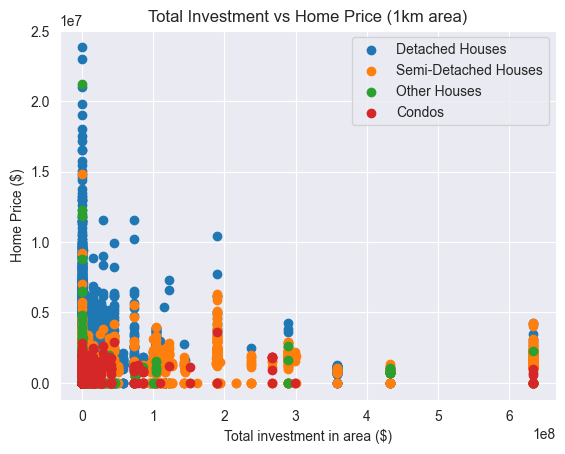

In [9]:
# plotting a scatter plot for 1km radius and total investment, seperated by house type
plt.scatter(detached1['Total_inv'], detached1['Price'], label = 'Detached Houses')
plt.scatter(semi_detached1['Total_inv'], semi_detached1['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses1['Total_inv'], other_houses1['Price'], label='Other Houses' )
plt.scatter(condos1['Total_inv'], condos1['Price'], label='Condos')

plt.xlabel('Total investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Total Investment vs Home Price (1km area)')
plt.legend()
plt.show()

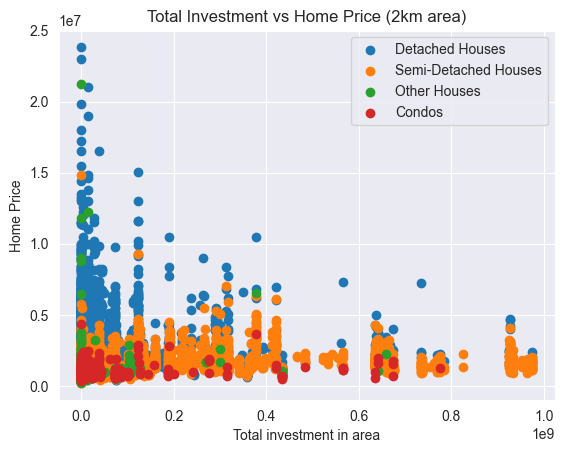

In [10]:
# plotting a scatter plot for 2km radius and total investment, seperated by house type

plt.scatter(detached['Total_inv'], detached['Price'], label = 'Detached Houses')
plt.scatter(semi_detached['Total_inv'], semi_detached['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses['Total_inv'], other_houses['Price'], label='Other Houses' )
plt.scatter(condos['Total_inv'], condos['Price'], label='Condos')

plt.xlabel('Total investment in area')
plt.ylabel('Home Price')
plt.title('Total Investment vs Home Price (2km area)')
plt.legend()
plt.show()

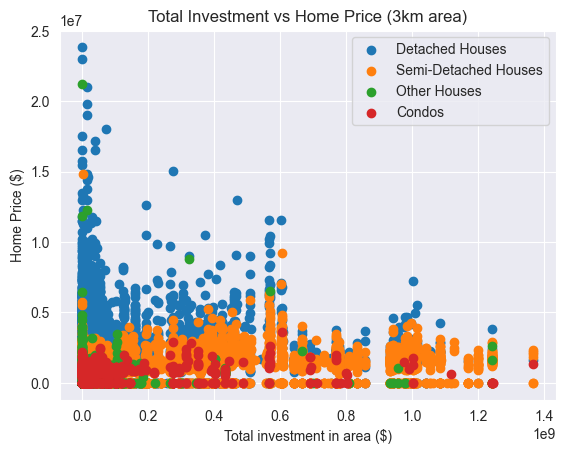

In [11]:
# plotting a scatter plot for 3km radius and total investment, seperated by house type
plt.scatter(detached3['Total_inv'], detached3['Price'], label = 'Detached Houses')
plt.scatter(semi_detached3['Total_inv'], semi_detached3['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses3['Total_inv'], other_houses3['Price'], label='Other Houses' )
plt.scatter(condos3['Total_inv'], condos3['Price'], label='Condos')

plt.xlabel('Total investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Total Investment vs Home Price (3km area)')
plt.legend()
plt.show()

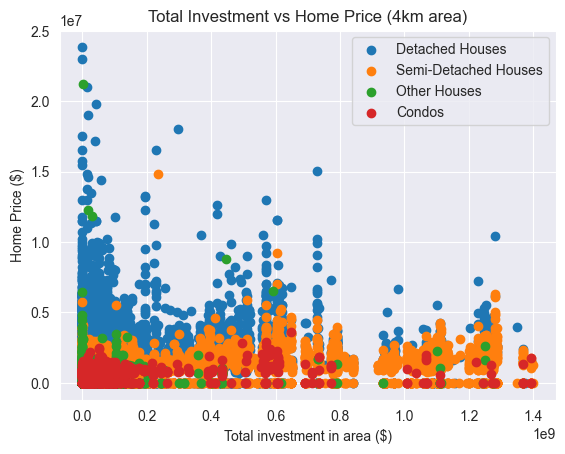

In [12]:
# plotting a scatter plot for 4km radius and total investment, seperated by house type
plt.scatter(detached4['Total_inv'], detached4['Price'], label = 'Detached Houses')
plt.scatter(semi_detached4['Total_inv'], semi_detached4['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses4['Total_inv'], other_houses4['Price'], label='Other Houses' )
plt.scatter(condos4['Total_inv'], condos4['Price'], label='Condos')

plt.xlabel('Total investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Total Investment vs Home Price (4km area)')
plt.legend()
plt.show()

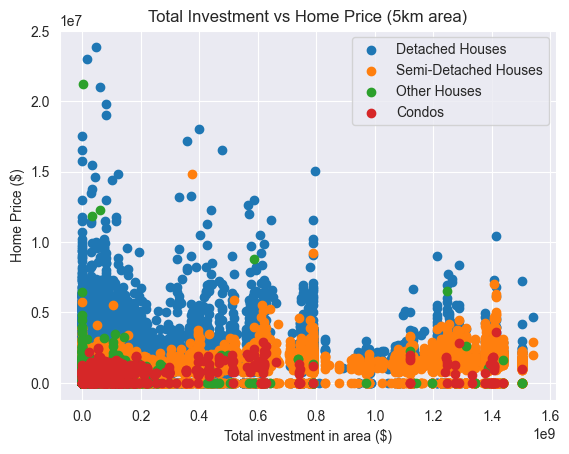

In [13]:
# plotting a scatter plot for 5km radius and total investment, seperated by house type
plt.scatter(detached5['Total_inv'], detached5['Price'], label = 'Detached Houses')
plt.scatter(semi_detached5['Total_inv'], semi_detached5['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses5['Total_inv'], other_houses5['Price'], label='Other Houses' )
plt.scatter(condos5['Total_inv'], condos5['Price'], label='Condos')

plt.xlabel('Total investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Total Investment vs Home Price (5km area)')
plt.legend()
plt.show()

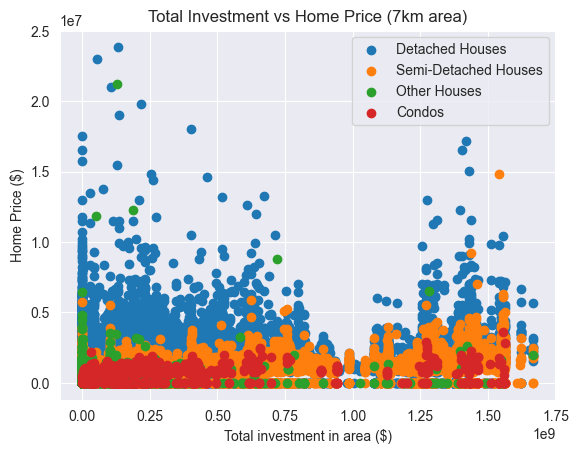

In [14]:
# plotting a scatter plot for 7km radius and total investment, seperated by house type
plt.scatter(detached7['Total_inv'], detached7['Price'], label = 'Detached Houses')
plt.scatter(semi_detached7['Total_inv'], semi_detached7['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses7['Total_inv'], other_houses7['Price'], label='Other Houses' )
plt.scatter(condos7['Total_inv'], condos7['Price'], label='Condos')

plt.xlabel('Total investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Total Investment vs Home Price (7km area)')
plt.legend()
plt.show()

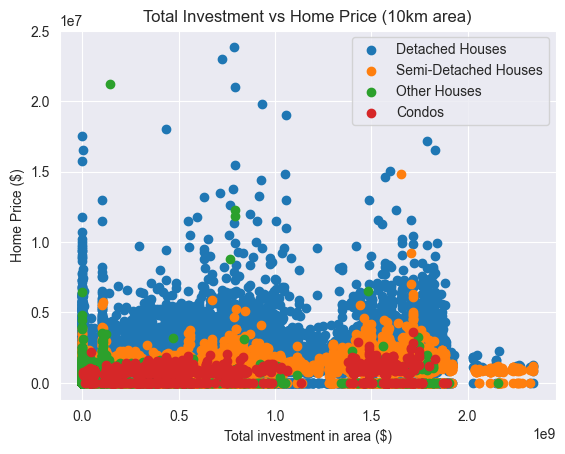

In [15]:
# plotting a scatter plot for 10km radius and total investment, seperated by house type
plt.scatter(detached10['Total_inv'], detached10['Price'], label = 'Detached Houses')
plt.scatter(semi_detached10['Total_inv'], semi_detached10['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses10['Total_inv'], other_houses10['Price'], label='Other Houses' )
plt.scatter(condos10['Total_inv'], condos10['Price'], label='Condos')

plt.xlabel('Total investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Total Investment vs Home Price (10km area)')
plt.legend()
plt.show()

It appears as if the greatest trend is for 2 km.  So let's look further into the 2 km data

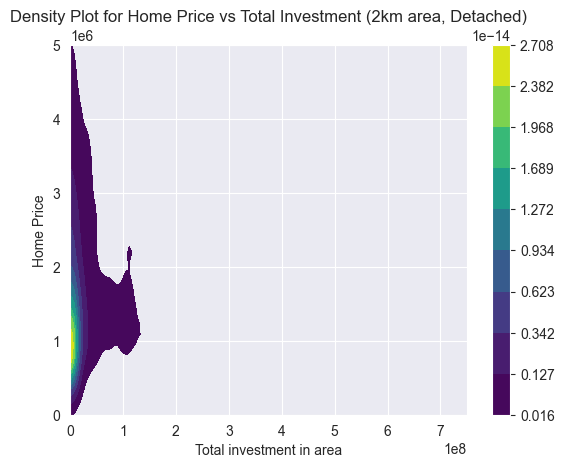

In [16]:
# plotting a density plot for detached homes and total investment
sns.kdeplot(x=detached['Total_inv'], y=detached['Price'], shade=True, cmap='viridis', bw='silverman',cbar=True)
plt.xlabel('Total investment in area')
plt.ylabel('Home Price')
plt.title('Density Plot for Home Price vs Total Investment (2km area, Detached)')

# Setting limits for x and y axes to zoom in on a specific region
plt.xlim(0, 750000000)
plt.ylim(0, 5000000)

plt.show()


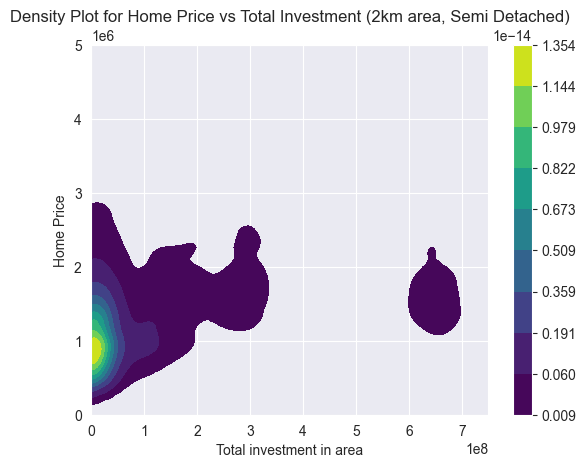

In [17]:
# plotting a density plot for semi_detached homes and total investment
sns.kdeplot(x=semi_detached['Total_inv'], y=semi_detached['Price'], shade=True, cmap='viridis', bw='silverman',cbar=True)
plt.xlabel('Total investment in area')
plt.ylabel('Home Price')
plt.title('Density Plot for Home Price vs Total Investment (2km area, Semi Detached)')

# Setting limits for x and y axes to zoom in on a specific region
plt.xlim(0, 750000000)
plt.ylim(0, 5000000)
plt.show()


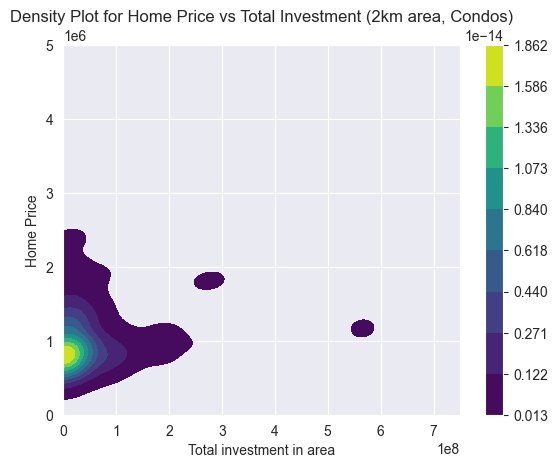

In [18]:
# plotting a density plot for condos and total investment
sns.kdeplot(x=condos['Total_inv'], y=condos['Price'], shade=True, cmap='viridis', bw='silverman',cbar=True)
plt.xlabel('Total investment in area')
plt.ylabel('Home Price')
plt.title('Density Plot for Home Price vs Total Investment (2km area, Condos)')

# Set limits for x and y axes to zoom in on a specific region
plt.xlim(0, 750000000)  # Adjust these limits based on your desired zoom level for the x-axis
plt.ylim(0, 5000000)  # Adjust these limits based on your desired zoom level for the y-axis

plt.show()

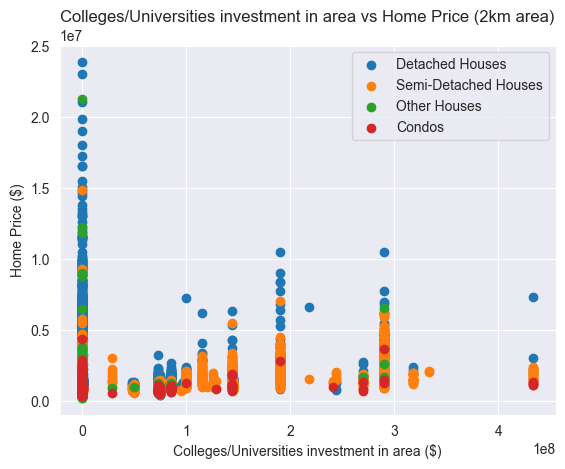

In [19]:
# plotting a scatter plot for 2km radius and college/universities related investments, seperated by house type
plt.scatter(detached['Colleges/Universities investment in area'], detached['Price'], label = 'Detached Houses')
plt.scatter(semi_detached['Colleges/Universities investment in area'], semi_detached['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses['Colleges/Universities investment in area'], other_houses['Price'], label='Other Houses' )
plt.scatter(condos['Colleges/Universities investment in area'], condos['Price'], label='Condos')

plt.xlabel('Colleges/Universities investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Colleges/Universities investment in area vs Home Price (2km area)')
plt.legend()
plt.show()

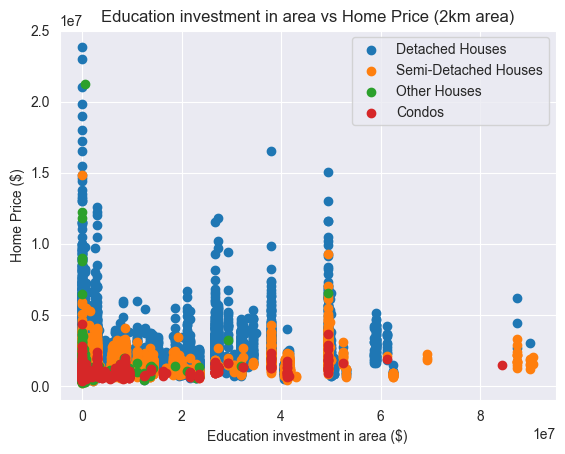

In [20]:
# plotting a scatter plot for 2km radius and education related investments, seperated by house type
plt.scatter(detached['Education investment in area'], detached['Price'], label = 'Detached Houses')
plt.scatter(semi_detached['Education investment in area'], semi_detached['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses['Education investment in area'], other_houses['Price'], label='Other Houses' )
plt.scatter(condos['Education investment in area'], condos['Price'], label='Condos')

plt.xlabel('Education investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Education investment in area vs Home Price (2km area)')
plt.legend()
plt.show()

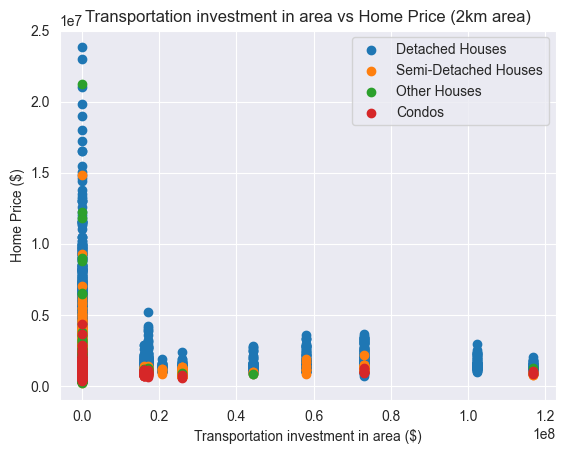

In [21]:
# plotting a scatter plot for 2km radius and transportation related investments, seperated by house type
plt.scatter(detached['Transportation investment in area'], detached['Price'], label = 'Detached Houses')
plt.scatter(semi_detached['Transportation investment in area'], semi_detached['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses['Transportation investment in area'], other_houses['Price'], label='Other Houses' )
plt.scatter(condos['Transportation investment in area'], condos['Price'], label='Condos')

plt.xlabel('Transportation investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Transportation investment in area vs Home Price (2km area)')
plt.legend()
plt.show()

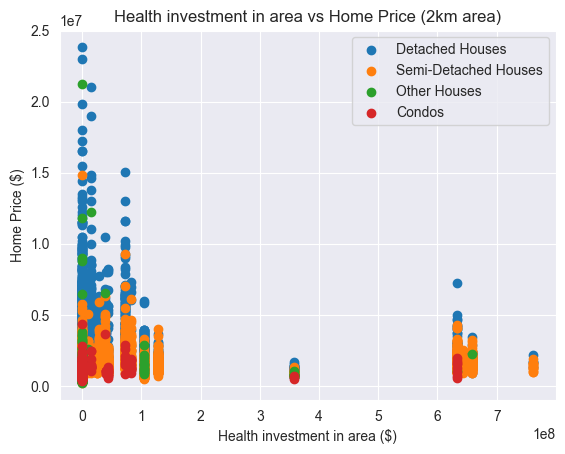

In [22]:
# plotting a scatter plot for 2km radius and health related investments, seperated by house type
plt.scatter(detached['Health investment in area'], detached['Price'], label = 'Detached Houses')
plt.scatter(semi_detached['Health investment in area'], semi_detached['Price'], label = 'Semi-Detached Houses')
plt.scatter(other_houses['Health investment in area'], other_houses['Price'], label='Other Houses' )
plt.scatter(condos['Health investment in area'], condos['Price'], label='Condos')

plt.xlabel('Health investment in area ($)')
plt.ylabel('Home Price ($)')
plt.title('Health investment in area vs Home Price (2km area)')
plt.legend()
plt.show()

It's important to add context for the data.  How much of our data was each type of house?

In [23]:
print('Amount of detached homes: ' + str(len(detached)))
print('Amount of detached homes: ' + str(len(semi_detached)))
print('Amount of detached homes: ' + str(len(other_houses)))
print('Amount of detached homes: ' + str(len(condos)))

Amount of detached homes: 38339
Amount of detached homes: 16968
Amount of detached homes: 660
Amount of detached homes: 823
